In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
from sklearn import utils
from sklearn import feature_selection

In [2]:
df=pd.read_csv("E://Programs/MACHINE LEARNING WITH PYTHON-GLOBSYN/datasets/pima_diabetics.csv")


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
np         768 non-null int64
pgc        768 non-null int64
bp         768 non-null int64
tsft       768 non-null int64
insulin    768 non-null int64
bmi        768 non-null float64
dpf        768 non-null float64
age        768 non-null int64
class      768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df[:10]

,np,pgc,bp,tsft,insulin,bmi,dpf,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


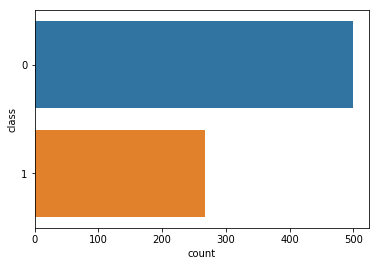

In [5]:
sns.countplot(y="class",data=df)

In [6]:
df["class"].value_counts(normalize=True)*100  #Percentage of Diabetic and non Diabetic

0    65.104167
1    34.895833
Name: class, dtype: float64

In [7]:
df["np"].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: np, dtype: int64

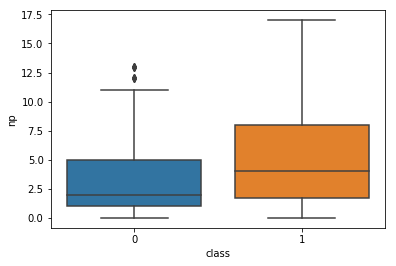

In [8]:
sns.boxplot(x="class",y="np",data=df)

In [9]:
df[df.bp==0].shape[0]

35

In [10]:
df[df.insulin==0].shape[0]

374

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\User\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


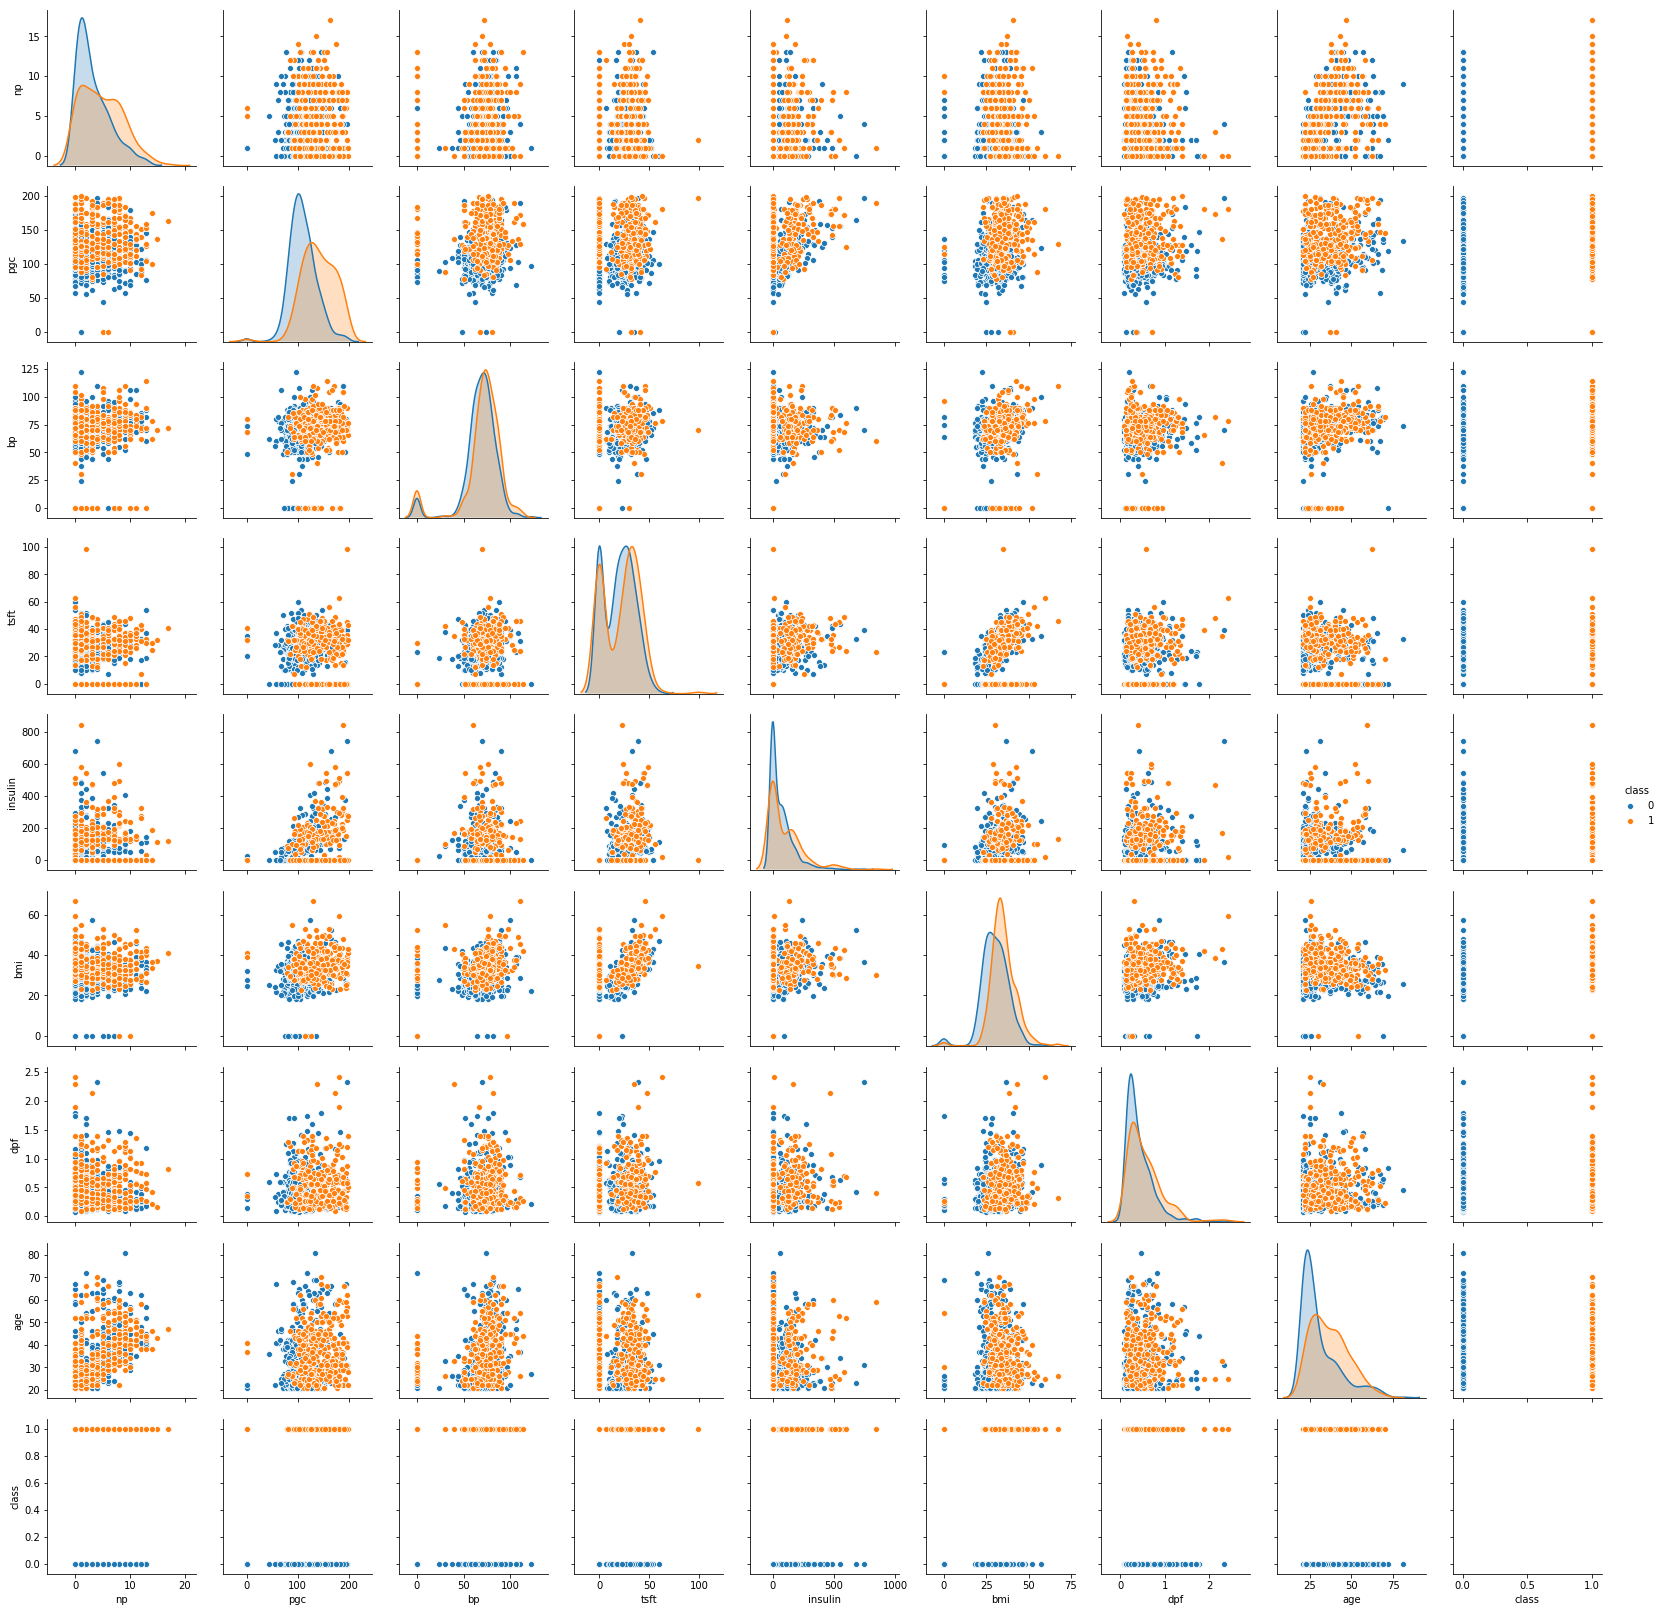

In [11]:
# X->y must be high  correlation happens between two continuous values so its not possible 
# X->X must be low
sns.pairplot(data=df,hue="class")

In [12]:
X=df.drop("class",axis=1)

In [13]:
y=df["class"]

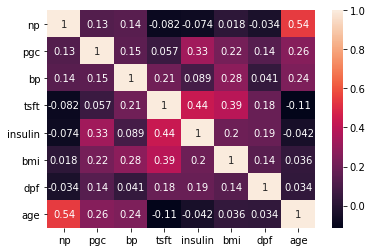

In [14]:
sns.heatmap(X.corr(),annot=True)

In [15]:
df.groupby("class")["tsft"].median()

class
0    21
1    27
Name: tsft, dtype: int64

In [16]:
df.groupby("class")["pgc"].median()

class
0    107
1    140
Name: pgc, dtype: int64

In [17]:
#Annova analysis of variance 
f,p=feature_selection.f_classif(X,y)

In [18]:
for col,fval,pval in zip(X.columns.values,f,p):
    print("col: {}  ||  f : {:.4f}  ||  p{:.4f}".format(col,fval,pval))

col: np  ||  f : 39.6702  ||  p0.0000
col: pgc  ||  f : 213.1618  ||  p0.0000
col: bp  ||  f : 3.2570  ||  p0.0715
col: tsft  ||  f : 4.3044  ||  p0.0383
col: insulin  ||  f : 13.2811  ||  p0.0003
col: bmi  ||  f : 71.7721  ||  p0.0000
col: dpf  ||  f : 23.8713  ||  p0.0000
col: age  ||  f : 46.1406  ||  p0.0000


In [19]:
def printresult(actual,predicted):
    confmatrix=metrics.confusion_matrix(actual,predicted)
    accscore=metrics.accuracy_score(actual,predicted)
    precscore=metrics.precision_score(actual,predicted)
    recscore=metrics.recall_score(actual,predicted)
    print(confmatrix)
    print("accuracy : {:.4f}".format(accscore))
    print("precision : {:.4f}".format(precscore))
    print("recall : {:.4f}".format(recscore))
    print("f1-score : {:.4f}".format(metrics.f1_score(actual,predicted)))
    print("AUC : {:.4f}".format(metrics.roc_auc_score(actual,predicted)))

In [20]:
Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=.2,random_state=42,stratify=y)

In [21]:
model=linear_model.LogisticRegression()
model.fit(Xtrain,ytrain)
predict_train=model.predict(Xtrain)
predict_test=model.predict(Xtest)
printresult(ytrain,predict_train)
printresult(ytest,predict_test)

[[362  38]
 [ 95 119]]
accuracy : 0.7834
precision : 0.7580
recall : 0.5561
f1-score : 0.6415
AUC : 0.7305
[[85 15]
 [27 27]]
accuracy : 0.7273
precision : 0.6429
recall : 0.5000
f1-score : 0.5625
AUC : 0.6750


In [22]:
model.intercept_

array([-5.73497977])

In [23]:
model.coef_
#mention why youre maximing recall value or precision value and explain it otherwise globsyn wont accept your project

array([[ 1.04490241e-01,  2.82959132e-02, -1.61729889e-02,
         2.95882187e-03, -4.24462263e-04,  5.68084047e-02,
         5.17214799e-01,  6.66086516e-03]])

In [24]:
selkbest=feature_selection.SelectKBest(feature_selection.f_classif,k=4)

In [25]:
selkbest.fit(X,y)

SelectKBest(k=4, score_func=<function f_classif at 0x00000280FE147F28>)

In [26]:
selkbest.get_support()

array([ True,  True, False, False, False,  True, False,  True])

In [27]:
X.columns.values[selkbest.get_support()]

array(['np', 'pgc', 'bmi', 'age'], dtype=object)

In [28]:
Xtrain1=Xtrain[X.columns.values[selkbest.get_support()]]
Xtest1=Xtest[X.columns.values[selkbest.get_support()]]

In [56]:
model=linear_model.LogisticRegression()
model.fit(Xtrain1,ytrain)
predict_train=model.predict(Xtrain1)
predict_test=model.predict(Xtest1)
printresult(ytrain,predict_train)
printresult(ytest,predict_test)

[[361  39]
 [ 97 117]]
accuracy : 0.7785
precision : 0.7500
recall : 0.5467
f1-score : 0.6324
AUC : 0.7246
[[82 18]
 [28 26]]
accuracy : 0.7013
precision : 0.5909
recall : 0.4815
f1-score : 0.5306
AUC : 0.6507


In [31]:
#Selectfrommodel,RFE(Recursive Feature Elimination)

In [32]:
Xtest1.columns.values

array(['np', 'pgc', 'bmi', 'age'], dtype=object)

In [33]:
Xtrain1.columns.values

array(['np', 'pgc', 'bmi', 'age'], dtype=object)

In [34]:
distances=model.decision_function(Xtest1)

In [35]:
Xtest1.shape

(154, 4)

In [36]:
distances.shape

(154,)

In [37]:
distances[:5]

array([ 0.41662844, -1.34068152, -0.67723032, -0.81413069, -3.75254587])

In [38]:
distances.min()

-4.632495854362093

In [39]:
predicted1=(distances >0).astype(np.int)

In [41]:
metrics.confusion_matrix(ytest,predicted1)

array([[82, 18],
       [28, 26]], dtype=int64)

In [42]:
prec,recall,threshold = metrics.precision_recall_curve(ytest,predict_test)


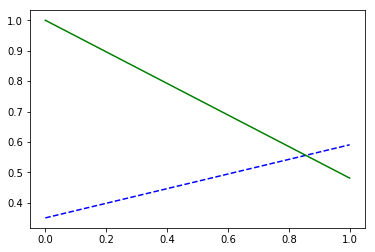

In [45]:
plt.plot(threshold,prec[:-1],'b--')
plt.plot(threshold,recall[:-1],'g-')

Text(0,0.5,'precision')

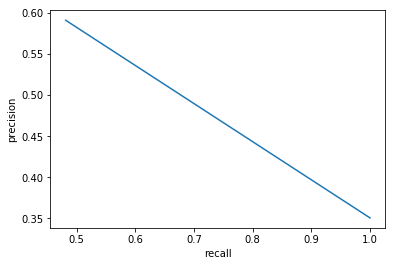

In [47]:
plt.plot(recall[:-1],prec[:-1])  #PRECISION RECALL CURVE IS ONE OF THE MOST IMPORTANT THINGS IN MACHINE LEARNING BECAUSE IF ITS NOT IDEAL 
#IT MEANS THAT YOUR CLASSIFIER IS STABLE
# a quater circle in the first quadrant is the ideal recall precision curve 
plt.xlabel("recall")
plt.ylabel("precision")

In [51]:
fpr,tpr,th=metrics.roc_curve(ytest,predict_test)

Text(0,0.5,'tpr')

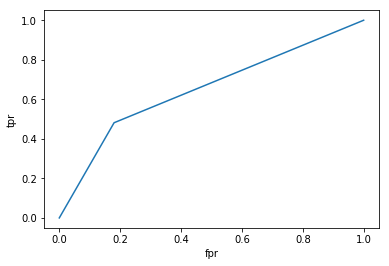

In [60]:
plt.plot(fpr,tpr)
plt.xlabel("fpr")
plt.ylabel("tpr")

In [61]:
metrics.roc_auc_score(ytest,predict_test)

0.6507407407407407